In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
from sklearn.linear_model import Perceptron

In [3]:
# Creating an instance of a perceptron classifier
clf = Perceptron(tol=1e-3, random_state=0)

In [4]:
# reading data from the csv files
hr_employee = pd.read_csv( './Data/HR_Employee.csv', delimiter = ",")
Attrition = pd.read_csv( './Data/Attrition.csv', delimiter = ",")

In [5]:
# Training and testing split on the data
X = hr_employee

Y = Attrition

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1176, 69) (1176, 1)
(294, 69) (294, 1)


In [6]:
from sklearn import metrics

In [7]:
# fit the data distribution to the classifier
clf.fit(X_train, y_train.values.ravel())

Perceptron()

In [8]:
clf.score(X_train, y_train.values.ravel())

0.8571428571428571

In [9]:
train_pred = clf.predict(X_train)

In [10]:
train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
test_pred = clf.predict(X_test)

In [12]:
#Training and Tesing accuracy
train_accuracy = metrics.accuracy_score(y_train.values.ravel(), train_pred)
test_accuracy = metrics.accuracy_score(y_test.values.ravel(), test_pred)

print("training and testing accuracies are : ", train_accuracy, test_accuracy)

training and testing accuracies are :  0.8571428571428571 0.8197278911564626


In [13]:
# Metrics for Testing set
tn, fp, fn, tp = metrics.confusion_matrix(y_true = y_test, y_pred = test_pred).ravel()
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = 2 * (recall * precision)/(recall + precision)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2

print("For the testing set : ")
print(" The actual recall is : ",recall,"\n","The actual precision is : ",precision,"\n","The actual specificity is : ",specificity,"\n","The f1 score is : ",f1,"\n","The balanced accuracy is : ", balanced_accuracy)

For the testing set : 
 The actual recall is :  0.037037037037037035 
 The actual precision is :  0.6666666666666666 
 The actual specificity is :  0.9958333333333333 
 The f1 score is :  0.07017543859649122 
 The balanced accuracy is :  0.5164351851851852


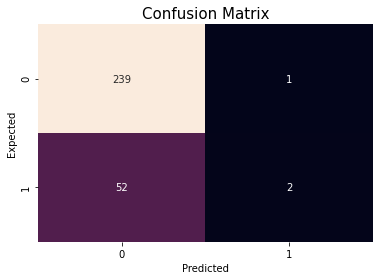

In [14]:
# Confusion matrix plotting
cm_plot =  pd.crosstab(index=y_test.values.ravel(), columns=test_pred, rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(cm_plot, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()